In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

Duplicate key in file 'C:\\Users\\AnhNQ\\.matplotlib\\matplotlibrc' line #623.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(5)

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


In [3]:
train = train.rename(columns={'賃料':'Rent', '契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})
test = test.rename(columns={'契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})

In [4]:
train.head(2)

,id,Rent,Location,Access,Type,Age,Direction,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Surround,Material,Contract
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間


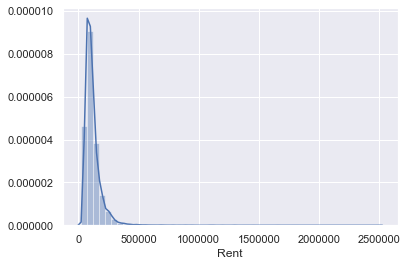

In [5]:
sns.distplot(train['Rent'])

In [6]:
train.isnull().sum()

id              0
Rent            0
Location        0
Access          0
Type            0
Age             0
Direction    2749
Area            0
Floor           0
Bath          329
Kitchen       621
Internet     3440
Facility       82
Parking      5287
Surround     9432
Material        0
Contract     7120
dtype: int64

In [7]:
train['Location'].value_counts()

東京都板橋区板橋３丁目1-8         54
東京都世田谷区太子堂２丁目          53
東京都足立区新田１丁目            47
東京都中野区白鷺２丁目1-21        45
東京都中央区日本橋馬喰町２丁目4-12    44
                       ..
東京都大田区久が原３丁目33-17       1
東京都中央区月島１丁目15-10        1
東京都江戸川区一之江２丁目５－５        1
東京都練馬区高松５丁目4-3          1
東京都練馬区桜台１丁目16-5         1
Name: Location, Length: 11333, dtype: int64

In [8]:
train['Location'].isnull().sum()

0

In [9]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset['City'] = dataset['Location'].str.extract('(千代田区|中央区|港区|新宿区|文京区|'
                                                 '台東区|墨田区|江東区|品川区|目黒区|'
                                                 '大田区|世田谷区|渋谷区|中野区|杉並区|'
                                                 '豊島区|北区|荒川区|板橋区|練馬区|足立区|葛飾区|江戸川区)')

In [10]:
train[['City', 'Rent']].groupby(['City'], as_index=False).mean().sort_values(by="Rent",ascending=False)

,City,Rent
16,港区,214061.744878
4,千代田区,182706.236324
1,中央区,180887.865520
15,渋谷区,171839.786802
17,目黒区,145674.389052
10,新宿区,130573.957482
9,文京区,128562.070628
5,台東区,127625.944206
14,江東区,126217.110743
6,品川区,124609.473270


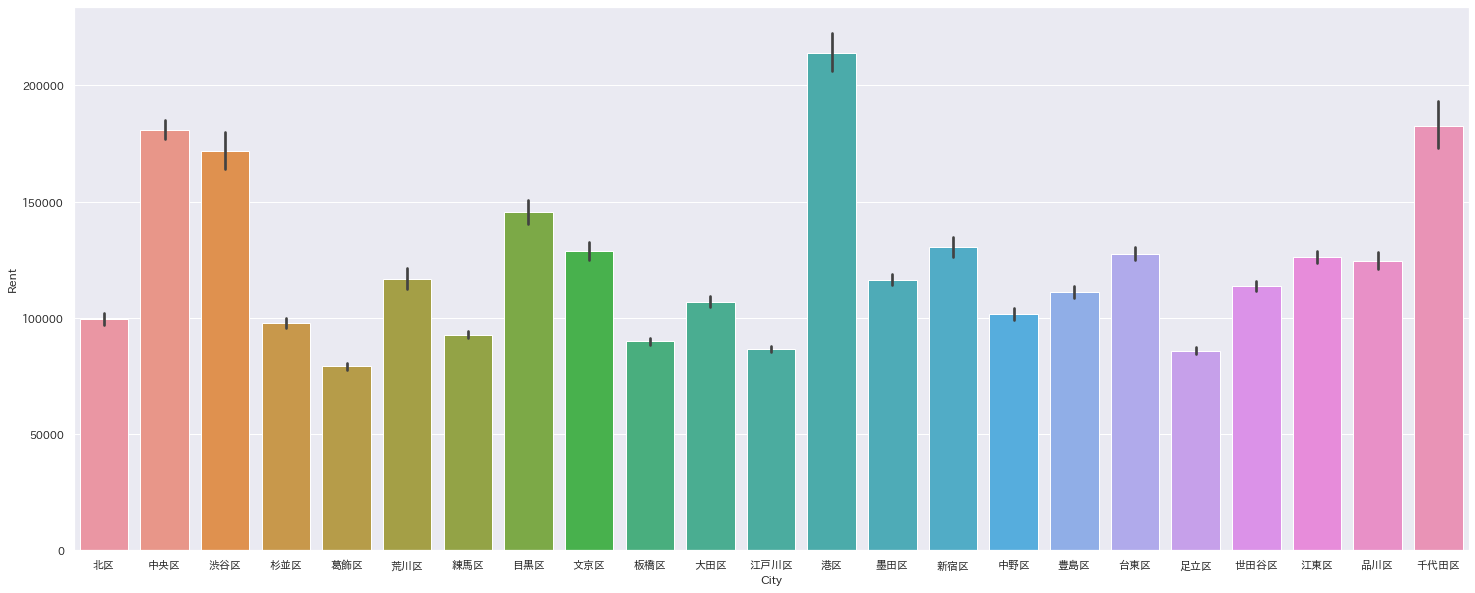

In [11]:
sns.set(font='IPAexGothic')
plt.figure(figsize=(25,10))
sns.barplot(x=train['City'],y=train['Rent'],data=train)

In [12]:
train['Type'].value_counts()

1K            11930
1R             5082
1LDK           4823
2LDK           2552
2DK            1909
1DK            1893
3LDK           1124
2K              920
3DK             419
1LDK+S(納戸)      238
2LDK+S(納戸)      157
4LDK            124
1K+S(納戸)         75
3LDK+S(納戸)       68
3K               48
2DK+S(納戸)        25
4DK              16
5LDK             15
1DK+S(納戸)        14
4LDK+S(納戸)       12
3DK+S(納戸)         6
5LDK+S(納戸)        4
5DK               4
4K                4
6LDK              2
1LK+S(納戸)         2
2K+S(納戸)          1
5DK+S(納戸)         1
5K                1
3K+S(納戸)          1
Name: Type, dtype: int64

In [13]:
train['Type'].isnull().sum()

0

In [14]:
for dataset in train_test_data:
    dataset['R'] = dataset['Type'].str.extract('([0-9])')
    dataset['K'] = dataset['Type'].str.extract('(K)')
    dataset['L'] = dataset['Type'].str.extract('(L)')
    dataset['D'] = dataset['Type'].str.extract('(D)')
    dataset['S'] = dataset['Type'].str.extract('(S)')

In [15]:
train['K'] = train['K'].apply(lambda x: True if x == 'K' else False)
train['D'] = train['D'].apply(lambda x: True if x == 'D' else False)
train['L'] = train['L'].apply(lambda x: True if x == 'L' else False)
train['S'] = train['S'].apply(lambda x: True if x == 'S' else False)

In [16]:
train[['id','R','K','D','L','S']].groupby(['id','R'],as_index=False).mean().head(10)

,id,R,K,D,L,S
0,1,1,True,False,False,False
1,2,1,False,False,False,False
2,3,1,True,False,False,False
3,4,2,True,True,True,False
4,5,2,True,True,False,False
5,6,2,True,True,True,False
6,7,1,True,False,False,False
7,8,1,True,False,False,False
8,9,2,True,True,False,False
9,10,1,True,True,False,False


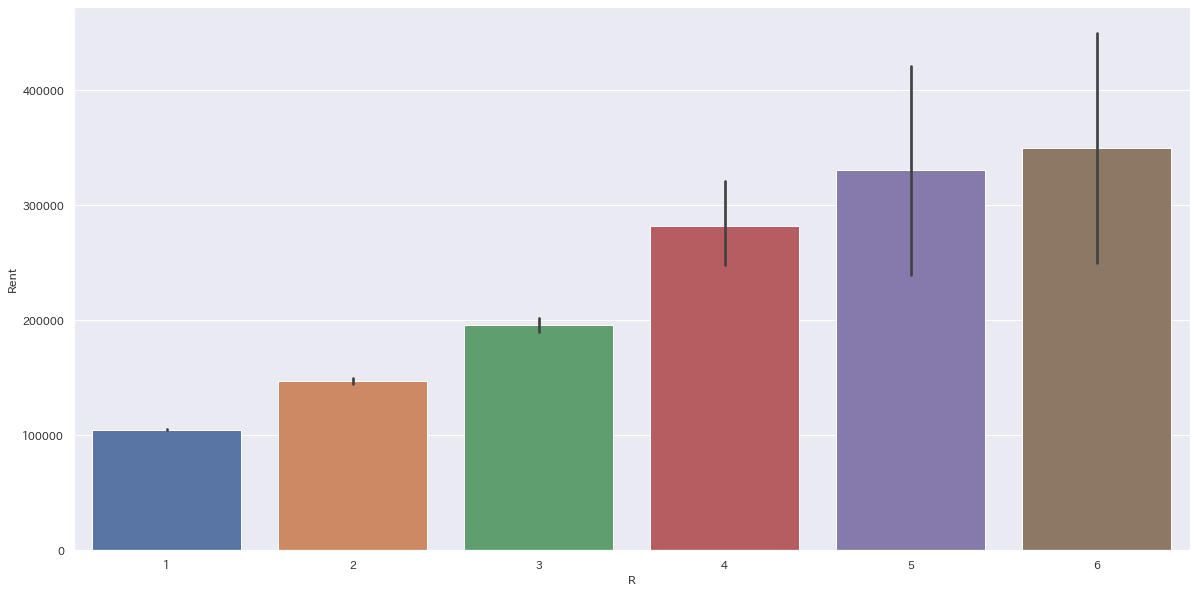

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x=train['R'],y=train['Rent'],data=train)

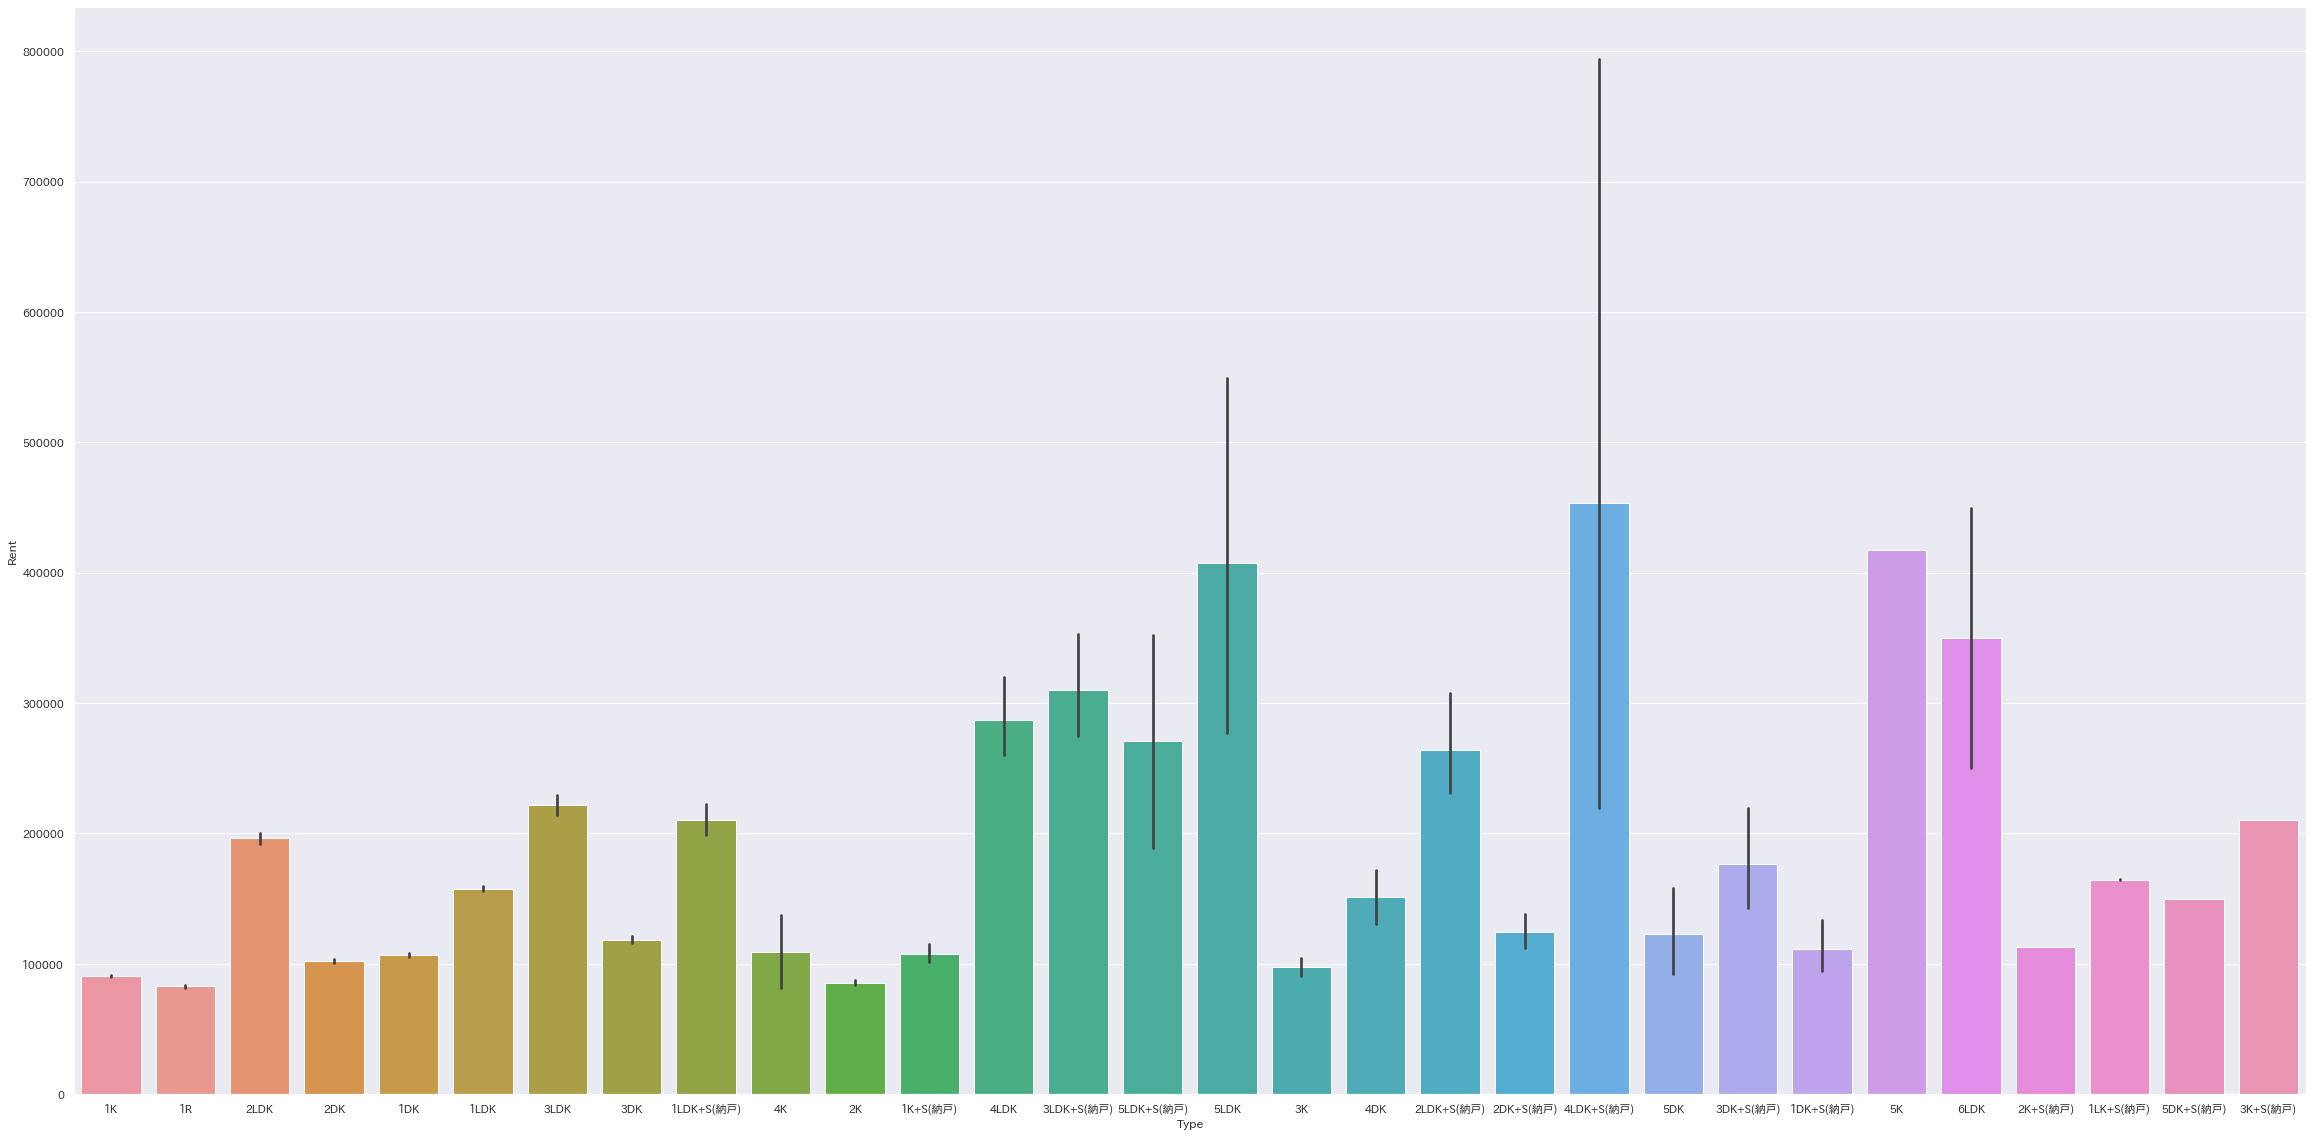

In [18]:
plt.figure(figsize=(40,20))
sns.barplot(x=train['Type'],y=train['Rent'],data=train)

In [19]:
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].str.extract('([0-9]*年)')
    dataset['Age'] = dataset['Age'].str.extract('([0-9]*)')

In [20]:
train['Age'].value_counts()

0      4508
12     1226
11     1223
2      1075
13     1075
       ... 
66        1
119       1
79        1
65        1
520       1
Name: Age, Length: 74, dtype: int64

In [21]:
train['Age'].isnull().sum()

889

In [22]:
train['Age'].fillna(0,inplace=True)

In [23]:
train['Age'].isnull().sum()

0

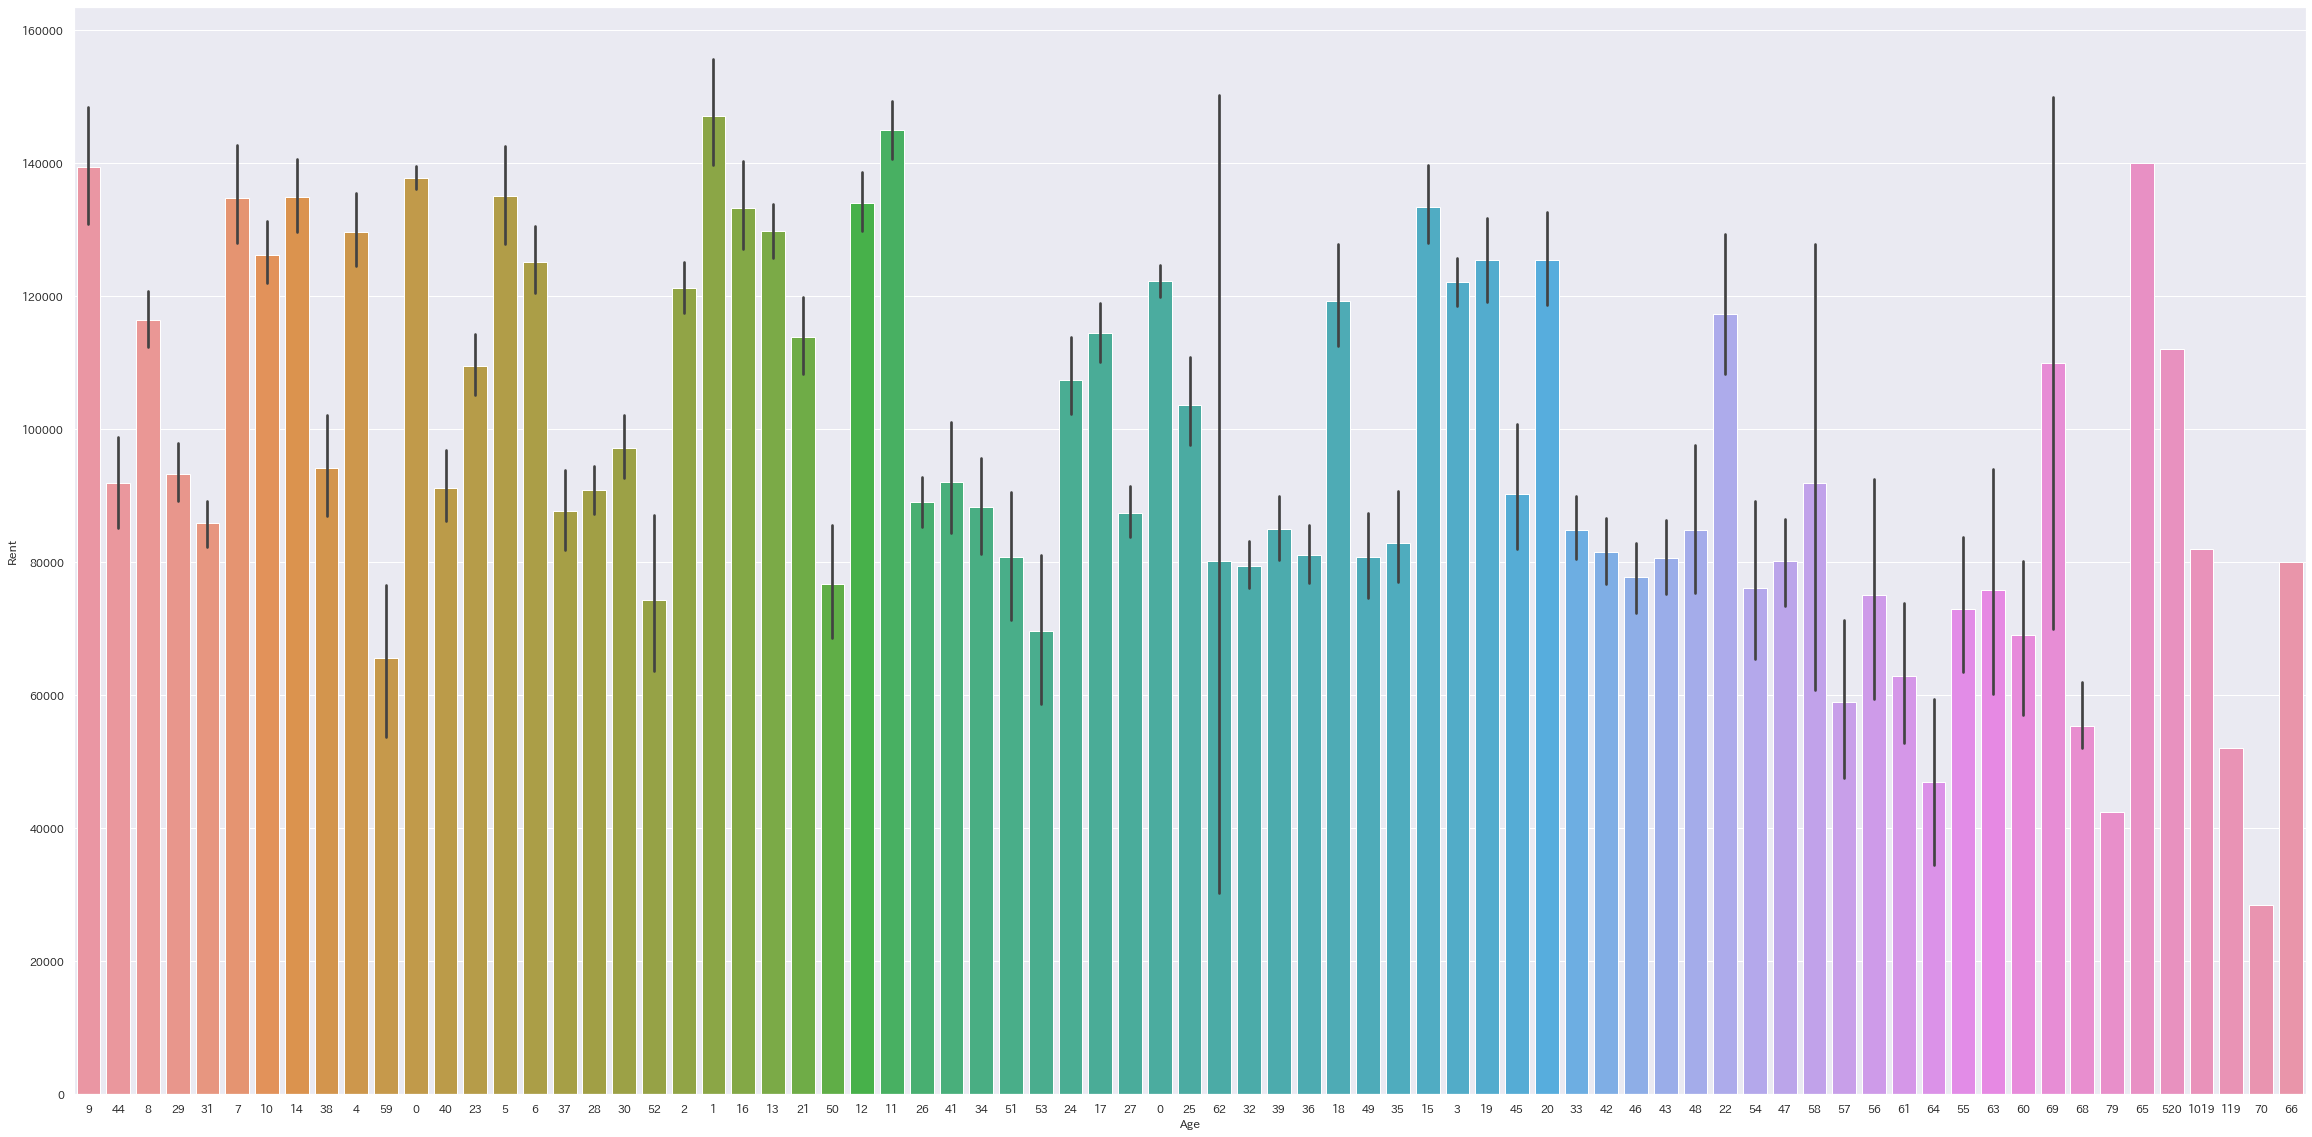

In [24]:
plt.figure(figsize=(40,20))
sns.barplot(x=train['Age'],y=train['Rent'],data=train)

In [25]:
train['Direction'].value_counts()

南     8909
東     4995
西     4026
南東    3098
南西    3080
北     1966
北西    1326
北東    1321
Name: Direction, dtype: int64

In [26]:
train['Direction'].isnull().sum()

2749

In [27]:
train['Direction'].fillna('南',inplace=True)

In [28]:
train['Direction'].isnull().sum()

0

In [29]:
train[['Direction', 'Rent']].groupby(['Direction'], as_index=False).mean()

,Direction,Rent
0,北,126057.842319
1,北東,127517.737320
2,北西,135791.875566
3,南,110610.190084
4,南東,131210.768238
5,南西,126737.894481
6,東,113991.111311
7,西,116873.421510


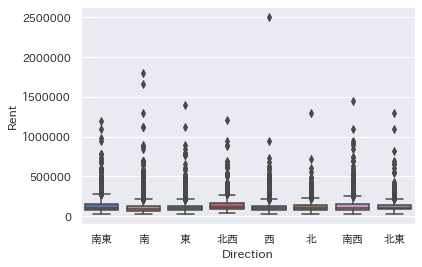

In [30]:
sns.boxplot(x=train['Direction'],y=train['Rent'],data=train)

In [31]:
for dataset in train_test_data:
    dataset['Area'] = dataset['Area'].str.extract('([0-9]*)')

In [32]:
train['Area'].value_counts()

25     3382
20     1483
26     1289
40     1246
22     1149
       ... 
159       1
223       1
171       1
169       1
217       1
Name: Area, Length: 174, dtype: int64

In [33]:
train['Area'].isnull().sum()

0

In [34]:
train[['Area', 'Rent']].groupby(['Area'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

,Area,Rent
80,217,2500000.0
101,341,1660000.0
86,232,1450000.0
83,223,1300000.0
28,125,1300000.0
57,163,1200000.0
82,221,1120000.0
65,171,1100000.0
75,192,1100000.0
68,176,1100000.0


In [35]:
for dataset in train_test_data:
    dataset['Floor'] = dataset['Floor'].str.extract('([0-9]*階／)')
    dataset['Floor'] = dataset['Floor'].str.extract('([0-9]*)')

In [36]:
train['Floor'].value_counts()

2     8137
1     6043
3     5106
4     3110
5     1957
6     1394
7     1142
8      891
9      740
10     539
11     410
12     337
13     218
14     138
15      79
16      61
19      59
17      56
18      38
21      33
29      29
25      26
20      23
23      19
24      18
22      17
28      15
26      13
37      12
30      11
32      10
27       9
38       8
34       8
42       7
33       7
35       4
39       4
31       4
53       4
43       4
45       3
36       3
44       2
41       2
40       2
49       1
52       1
47       1
50       1
Name: Floor, dtype: int64

In [37]:
train['Floor'].isnull().sum()


714

In [38]:
train['Floor'].fillna(2,inplace=True)

In [39]:
train['Floor'].isnull().sum()

0

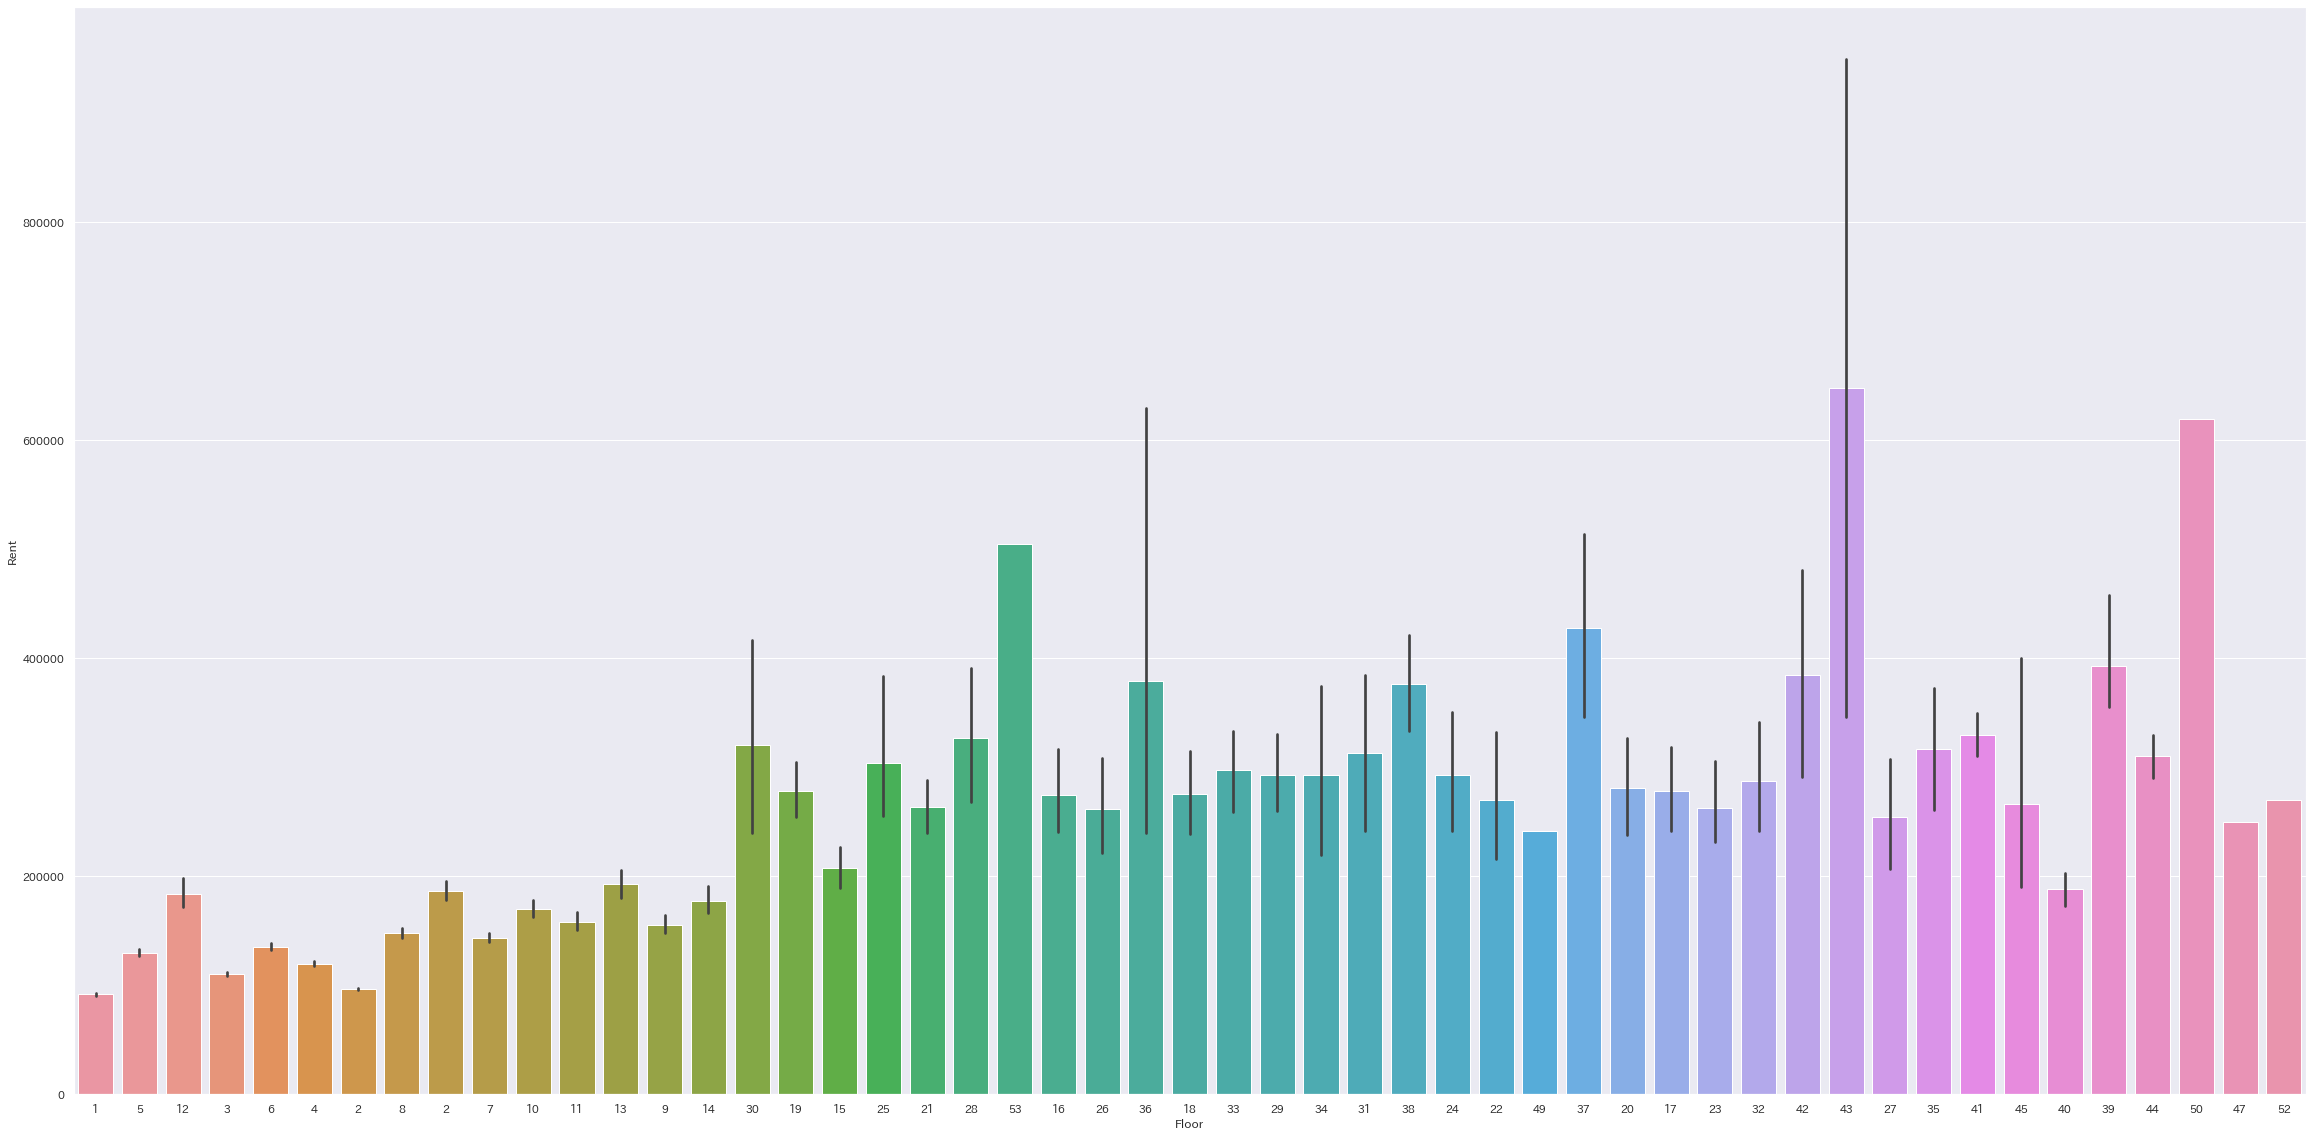

In [40]:
plt.figure(figsize=(40,20))
sns.barplot(x=train['Floor'],y=train['Rent'],data=train)

In [41]:
train[['Floor', 'Rent']].groupby(['Floor'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

,Floor,Rent
38,43,648250.000000
44,50,620000.000000
46,53,505000.000000
31,37,428000.000000
33,39,393250.000000
37,42,384285.714286
30,36,379600.000000
32,38,376812.500000
36,41,330000.000000
21,28,327066.666667


In [42]:
train['Material'].value_counts()

RC（鉄筋コンクリート）                   17505
木造                              5512
鉄骨造                             3726
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: Material, dtype: int64

In [43]:
train['Material'].isnull().sum()

0

In [44]:
train[['Material', 'Rent']].groupby(['Material'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)


,Material,Rent
4,SRC（鉄骨鉄筋コンクリート）,142525.408399
3,RC（鉄筋コンクリート）,134366.134704
0,ALC（軽量気泡コンクリート）,107103.703704
2,PC（プレキャスト・コンクリート（鉄筋コンクリート））,106195.652174
8,軽量鉄骨,94458.160044
1,HPC（プレキャスト・コンクリート（重量鉄骨））,93000.000000
9,鉄骨造,91993.971014
7,木造,83823.202286
5,その他,81724.448529
6,ブロック,60000.000000


In [45]:
train['Contract'].value_counts()

2年間                             22555
2年間\t※この物件は\t定期借家\tです。            931
5年間\t※この物件は\t定期借家\tです。            240
3年間\t※この物件は\t定期借家\tです。            230
1年間                                87
                                ...  
2020年7月まで                           1
2021年6月まで\t※この物件は\t定期借家\tです。        1
1年6ヶ月間\t※この物件は\t定期借家\tです。           1
1ヶ月間                                1
1年5ヶ月間\t※この物件は\t定期借家\tです。           1
Name: Contract, Length: 66, dtype: int64

In [46]:
for dataset in train_test_data:
    dataset['period'] = dataset['Contract'].str.extract('([0-9]*年[0-9]*月まで)')

In [47]:
train['period'].value_counts()

2022年3月まで     9
2021年3月まで     8
2020年5月まで     7
2020年3月まで     6
2022年6月まで     6
2024年3月まで     5
2020年8月まで     5
2021年2月まで     5
2020年6月まで     5
2022年2月まで     4
2021年4月まで     4
2022年7月まで     4
2021年12月まで    3
2020年12月まで    2
2021年7月まで     2
2024年9月まで     2
2020年2月まで     2
2023年8月まで     2
2024年2月まで     2
2023年2月まで     2
2021年8月まで     2
2019年12月まで    2
2023年3月まで     1
2021年9月まで     1
2022年8月まで     1
2021年1月まで     1
2021年5月まで     1
2021年6月まで     1
2022年5月まで     1
2020年1月まで     1
2023年10月まで    1
2022年9月まで     1
2020年7月まで     1
Name: period, dtype: int64